### Python implementation of [Finding a "Kneedle" in a Haystack: Detecting Knee Points in System Behavior](https://www1.icsi.berkeley.edu/~barath/papers/kneedle-simplex11.pdf)

In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import seaborn as sns
from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt
sns.set_style('white')

def draw_plot(X, Y, knee_point=None):
    plt.plot(X, Y)
    if knee_point:
        plt.axvline(x=knee_point, color='k', linestyle='--')


mu = 50
sigma = 10
S = 1
n = 1000

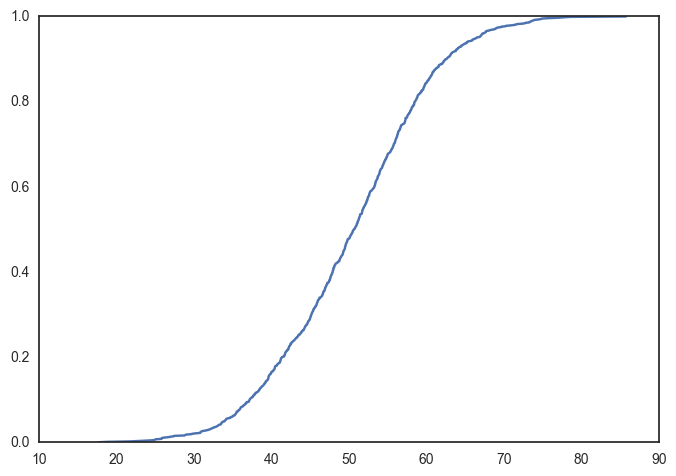

In [2]:
X = np.random.normal(mu, sigma, n)

sorted_X = np.sort(X)
Y = np.arange(len(X))/float(len(sorted_X))
    
draw_plot(sorted_X, Y)

In [3]:
def _locate(Y_d, T_lm, maxima_ids):
    n = len(Y_d)
    for j in range(0,n):
        for index, i in enumerate(maxima_ids):
            if j<=i:
                continue
            if Y_d[j] <= T_lm[index]:
                return index

def find_knee_point(X, Y, S):
    spl = UnivariateSpline(X, Y)
    X_s = np.linspace(np.min(X), np.max(X), n)
    Y_s = spl(X_s)
    X_sn = (X_s-np.min(X_s))/(np.max(X_s)-np.min(X_s))
    Y_sn = (Y_s-np.min(Y_s))/(np.max(Y_s)-np.min(Y_s))
    X_d = X_sn
    Y_d = Y_sn-X_sn
    X_lm = []
    Y_lm = []

    maxima_ids = []
    for i in range(1, n-1):
        if Y_d[i]>Y_d[i-1] and Y_d[i]>Y_d[i+1]:
            X_lm.append(X_d[i])
            Y_lm.append(Y_d[i])
            maxima_ids.append(i)
    T_lm = Y_lm - S* np.diff(X_sn)/(n-1)   
    knee_point_index = _locate(Y_d, T_lm, maxima_ids)
    knee_point = X_lm[knee_point_index]*(np.max(X_s)-np.min(X_s))+np.min(X_s)
    return knee_point

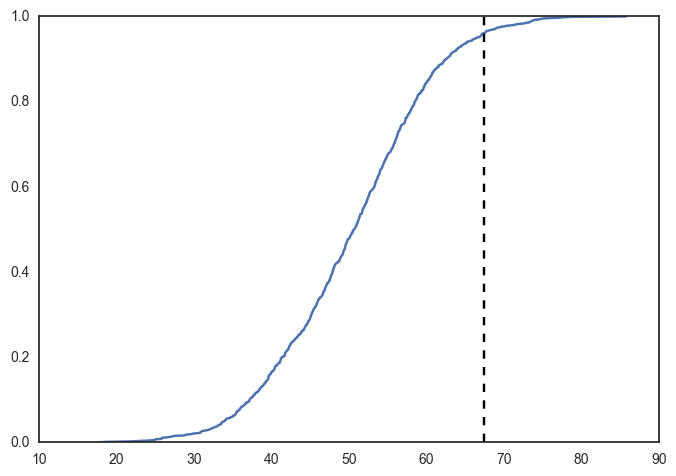

In [4]:
knee_point = find_knee_point(sorted_X, Y, S)
draw_plot(sorted_X, Y, knee_point)

In [9]:
x = np.linspace(0.1,1,10)
y = -1/x+5


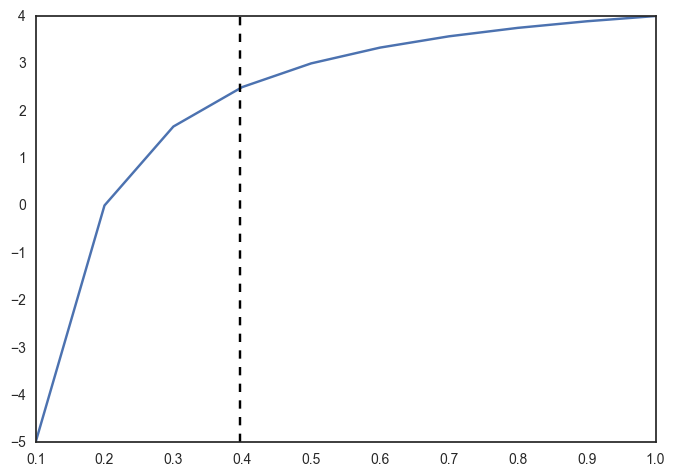

In [10]:
knee_point = find_knee_point(x, y, S)
draw_plot(x, y, knee_point)